In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [108]:
x=np.linspace(-5,5,100)
y=np.sqrt(10**2 - x**2)
x=np.hstack((x,-x))
y=np.hstack((y,-y))

In [109]:
x1=np.linspace(-5,5,100)
y1=np.sqrt(5**2 - x1**2)
x1=np.hstack((x1,-x1))
y1=np.hstack((y1,-y1))

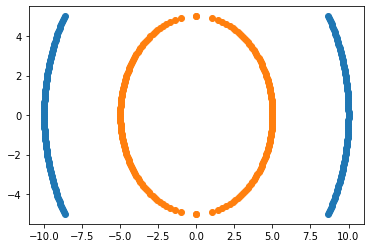

In [110]:
# plt.figure(figsize=(10,10))
plt.scatter(y,x)
plt.scatter(y1,x1)

In [111]:
df1=pd.DataFrame(np.vstack((x,y)).T,columns=['X1','X2'])
df1['Y']=0
df1.head()

,X1,X2,Y
0,-5.00000,8.660254,0
1,-4.89899,8.717792,0
2,-4.79798,8.773790,0
3,-4.69697,8.828277,0
4,-4.59596,8.881281,0


In [112]:
df2=pd.DataFrame(np.vstack((x1,y1)).T,columns=['X1','X2'])
df2['Y']=1
df2.head()

,X1,X2,Y
0,-5.00000,0.000000,1
1,-4.89899,0.999949,1
2,-4.79798,1.406908,1
3,-4.69697,1.714198,1
4,-4.59596,1.969049,1


In [113]:
df=df1.append(df2)
df

,X1,X2,Y
0,-5.00000,8.660254,0
1,-4.89899,8.717792,0
2,-4.79798,8.773790,0
3,-4.69697,8.828277,0
4,-4.59596,8.881281,0
...,...,...,...
195,-4.59596,-1.969049,1
196,-4.69697,-1.714198,1
197,-4.79798,-1.406908,1
198,-4.89899,-0.999949,1


C:\Users\vokth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



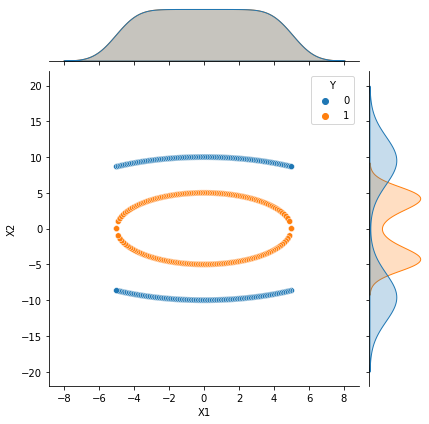

In [114]:
sns.jointplot('X1','X2',data=df,hue='Y',kind='scatter')

In [115]:
X=df.drop('Y',axis=1)
y=df['Y']

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=35)

# Linear kernel

In [117]:
model=SVC(kernel='linear')

In [118]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [119]:
y_predict=model.predict(X_test)
y_predict

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [120]:
accuracy_score(y_test,y_predict)

0.4875

In [121]:
cm1=confusion_matrix(y_test,y_predict)

<AxesSubplot:>

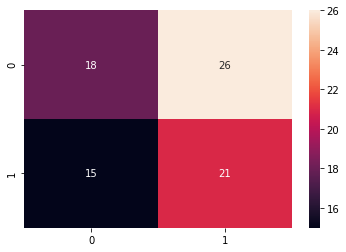

In [122]:
sns.heatmap(cm1,annot=True)

# rbf kernel

In [123]:
model1=SVC(kernel='rbf')
model1.fit(X_train,y_train)

SVC()

In [124]:
y_predict1=model1.predict(X_test)
accuracy_score(y_test,y_predict1)

1.0

# Polonomial kernel...>>>Mathematically

# X1^2         X1X2

# X1X2^2  X2^2


In [125]:
df['X1_square']=df['X1']**2
df['X2_square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']

In [126]:
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,-5.00000,8.660254,0,25.000000,75.000000,-43.301270
1,-4.89899,8.717792,0,24.000102,75.999898,-42.708375
2,-4.79798,8.773790,0,23.020610,76.979390,-42.096467
3,-4.69697,8.828277,0,22.061524,77.938476,-41.466150
4,-4.59596,8.881281,0,21.122845,78.877155,-40.818009


In [127]:
X=df.drop('Y',axis='columns')
y=df['Y']

In [128]:
#3D plot
import plotly.express as px
fig=px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [129]:
fig2=px.scatter_3d(df,x='X1_square',y='X2_square',z='X1*X2',color='Y')
fig2.show()

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=35)

In [131]:
model2=SVC(kernel='linear') #make the data easy for the model,so linear is applicable here

In [132]:
model2.fit(X_train,y_train)

SVC(kernel='linear')

In [133]:
y_predict2=model2.predict(X_test)

In [134]:
accuracy_score(y_test,y_predict2)

1.0

In [137]:
cm2=confusion_matrix(y_test,y_predict2)

<AxesSubplot:>

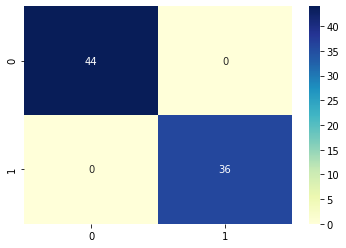

In [140]:
sns.heatmap(cm2,annot=True,cmap='YlGnBu')